In [1]:
import random
import numpy as np
import pandas as pd
from valuate import valuate

In [2]:
def normalize_theta(theta):
    # Chuẩn hóa sao cho tổng bằng 1
    return theta / np.sum(theta)

In [3]:
def transform_x52(value):
    return -value

In [4]:
df = pd.read_csv('../export.csv')
df['x52'] = df['x52'].apply(transform_x52)

filtered_df = df[df['label'] == 1]
X = filtered_df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values
y = filtered_df['label'].values 

In [5]:
filtered_df = df[df['label'] == 2]
X2 = filtered_df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values

In [6]:
def foo(theta):
    return np.dot(X, theta)
def foo2(theta):
    return np.dot(X2, theta)
    
def fitness(theta):
    normalized_theta = normalize_theta(theta)
    accuracy_list = valuate(normalized_theta)
    accuracy_list = np.array(accuracy_list)
    if accuracy_list.mean() > 0.5:
        return 1
    else:
        return accuracy_list.mean()
    
    # # # if ans == target_value:
    # # #     return 9999
    # # # # el
    # # if lower_bound <= ans <= upper_bound:
    # #     return 99999
    # # else:
    # #     return abs(1 / (ans - target_value))
    
    # label1 = [300, 500, 580]
    # label2 = [580, 620, 670]

    # normalized_theta = normalize_theta(theta)

    # ans1 = foo(normalized_theta)
    # ans2 = foo2(normalized_theta)
    # condition1 = np.all((label1[0] <= ans1) & (ans1 <= label1[2]))
    # condition2 = np.all((label2[0] <= ans2) & (ans2 <= label2[2]))


    # if condition1 and condition2:
    #     return 99999
    # else:
    #     return abs(1 / (ans1.mean() - label1[1] ))


In [7]:
def generate_initial_solutions(num_solutions, num_params):
    solutions = []
    for _ in range(num_solutions):
        solution = np.random.rand(num_params)
        solutions.append(tuple(solution))
    return solutions

def crossover(parent1, parent2): # Lai giua bo va me (1 phan cua bo, 1 phan cua me)
    crossover_point = random.randint(1, len(parent1) - 1)
    child = list(parent1[:crossover_point]) + list(parent2[crossover_point:])
    return tuple(child)

def mutate(child, mutation_rate):  # Ham dot bien
    mutated_child = tuple([gene * random.uniform(1 - mutation_rate, 1 + mutation_rate) for gene in child])
    return mutated_child

In [8]:
# Số lượng tham số
num_params = 16

# Số lượng giải pháp và thế hệ
num_solutions = 100
num_generations = 100

# Tạo thế hệ ban đầu
solutions = generate_initial_solutions(num_solutions, num_params)


In [9]:
for generation_id in range(num_generations):
    print(generation_id)
    rankedsolutions = [(fitness(s), s) for s in solutions]
    rankedsolutions = sorted(rankedsolutions, key=lambda x: x[0], reverse=True)

    print(f"=== Gen {generation_id} best solutions ===")
    print(rankedsolutions[0])  # Tìm giải pháp tốt nhất

    if rankedsolutions[0][0] ==1:
        break

    bestSolutions = rankedsolutions[:10]
    elements = np.concatenate([np.array(s[1]) for s in bestSolutions])
    newGen = []

    for _ in range(len(solutions)):
        # Crossover
        parent1, parent2 = random.choice(bestSolutions)[1], random.choice(bestSolutions)[1]
        child = crossover(parent1, parent2)

        # Mutation
        mutated_child = mutate(child, mutation_rate=0.01)

        # Chuẩn hóa tổng của mutated_child để bằng 1
        normalized_mutated_child = normalize_theta(mutated_child)

        newGen.append(normalized_mutated_child)

    solutions = newGen

0
=== Gen 0 best solutions ===
(0.3384066448094088, (0.5442969509602864, 0.7443966545414566, 0.06686938586439517, 0.08980183235180283, 0.5939092661218853, 0.16487306447155659, 0.2762496858266241, 0.25023569506889265, 0.2960552123329292, 0.6941819476762199, 0.9375444858096251, 0.0863412608940799, 0.11280268014271067, 0.6260285984289924, 0.09756385395977607, 0.7971960361424881))
1
=== Gen 1 best solutions ===
(0.3393159541065254, array([0.09608106, 0.1324669 , 0.01180732, 0.01605448, 0.10602421,
       0.02947926, 0.04898577, 0.04494173, 0.05292174, 0.12429329,
       0.166602  , 0.01542155, 0.02021486, 0.11106126, 0.01725811,
       0.00638647]))
2
=== Gen 2 best solutions ===
(0.34335096124566067, array([0.08727542, 0.1219043 , 0.010763  , 0.01470231, 0.09736536,
       0.02695644, 0.04489603, 0.04144761, 0.04816744, 0.11405479,
       0.15257674, 0.01403846, 0.01850608, 0.10225473, 0.00097075,
       0.10412052]))
3
=== Gen 3 best solutions ===
(0.34747922545457005, array([0.03969997,

In [10]:
accuracy_list = valuate(solutions[0])

In [11]:
solutions[0]

array([0.04119208, 0.14904338, 0.01029845, 0.01370866, 0.0820855 ,
       0.02656401, 0.04324435, 0.03868632, 0.05807783, 0.13775235,
       0.16635464, 0.014601  , 0.01820111, 0.08650275, 0.00090478,
       0.11278279])

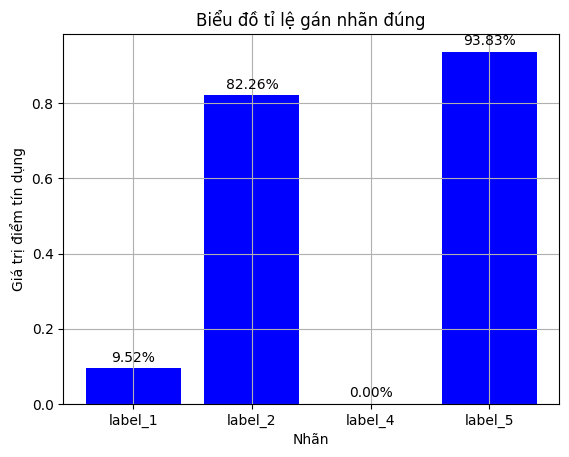

In [12]:
import matplotlib.pyplot as plt

label_name = ['label_1', 'label_2', 'label_4', 'label_5']
accuracy_list = valuate(solutions[0])
# Tạo danh sách chỉ số từ 1 đến độ dài của mảng
indices = list(range(1, len(accuracy_list) + 1))

# Vẽ biểu đồ cột
plt.bar(indices, accuracy_list, color='blue')

plt.title('Biểu đồ tỉ lệ gán nhãn đúng')
plt.xlabel('Nhãn')
plt.ylabel('Giá trị điểm tín dụng')

# Hiển thị giá trị trực tiếp trên đỉnh của mỗi cột với tên nhãn
for i, v in enumerate(accuracy_list):
    plt.text(i + 1, v + 0.01, f'\n{v*100:.2f}%', ha='center', va='bottom', color='black')

# Đặt nhãn trục x
plt.xticks(indices, label_name)
plt.grid(True)
plt.show()
